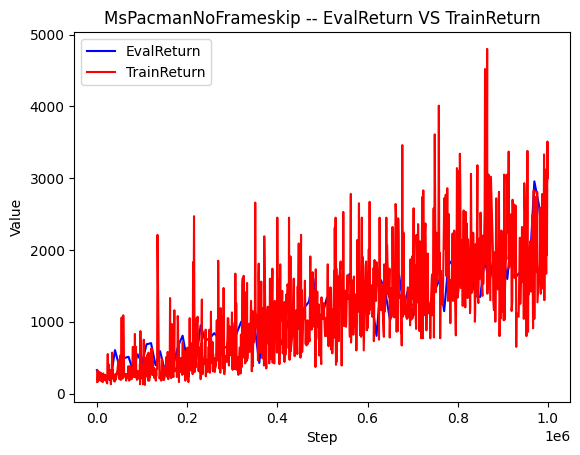

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two CSV files
# Assuming both CSV files have a 'step' (x-axis) column and 'value' columns for y-axis data
csv_file1 = './fig_data/EvalReturn_MsPacmanNoFrameskip-v0.csv'
csv_file2 = './fig_data/TrainReturn_MsPacmanNoFrameskip-v0.csv'

# Read CSV files
data1 = pd.read_csv(csv_file1)
data2 = pd.read_csv(csv_file2)

# Extract the common x-axis (assuming both CSVs have the same 'step' or x-axis column)
x_axis1 = data1['Step']
x_axis2 = data2['Step']

# Extract y-axis values from both CSVs (assuming both have 'value' columns for y-axis)
y_axis1 = data1['Value']  # y-values from the first CSV
y_axis2 = data2['Value']  # y-values from the second CSV

# Plot both curves on the same graph
plt.plot(x_axis1, y_axis1, label='EvalReturn', color='blue')
plt.plot(x_axis2, y_axis2, label='TrainReturn', color='red')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('MsPacmanNoFrameskip -- EvalReturn VS TrainReturn')

# Add legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()

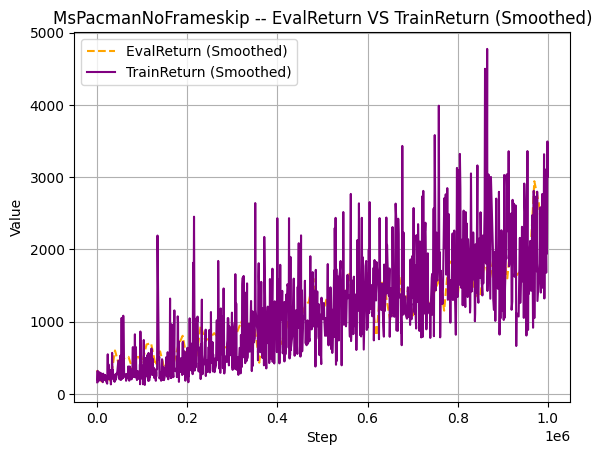

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two CSV files
csv_file1 = './fig_data/EvalReturn_MsPacmanNoFrameskip-v0.csv'
csv_file2 = './fig_data/TrainReturn_MsPacmanNoFrameskip-v0.csv'

# Read CSV files
data1 = pd.read_csv(csv_file1)
data2 = pd.read_csv(csv_file2)

# Extract the common x-axis (assuming both CSVs have the same 'step' or x-axis column)
x_axis1 = data1['Step']
x_axis2 = data2['Step']

# Extract y-axis values from both CSVs (assuming both have 'Value' columns for y-axis)
y_axis1 = data1['Value']
y_axis2 = data2['Value']

# Define a smoothing function (Simple Exponential Moving Average)
def smooth_curve(y_values, smooth_factor):
    smooth_y = []
    last = y_values[0]  # Initialize with the first value
    for point in y_values:
        smoothed_value = last * (1 - smooth_factor) + point * smooth_factor
        smooth_y.append(smoothed_value)
        last = smoothed_value
    return smooth_y

# Smoothing factor (closer to 1 gives more smoothing)
smooth_factor = 0.99

# Apply smoothing to the y-axis data
smooth_y_axis1 = smooth_curve(y_axis1, smooth_factor)
smooth_y_axis2 = smooth_curve(y_axis2, smooth_factor)

# Plot both curves with smoothing, distinguishable colors, markers, and line styles
plt.plot(x_axis1, smooth_y_axis1, label='EvalReturn (Smoothed)', color='orange', linestyle='--')
plt.plot(x_axis2, smooth_y_axis2, label='TrainReturn (Smoothed)', color='purple', linestyle='-')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('MsPacmanNoFrameskip -- EvalReturn VS TrainReturn (Smoothed)')

# Add grid for better readability
plt.grid(True)

# Add legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()

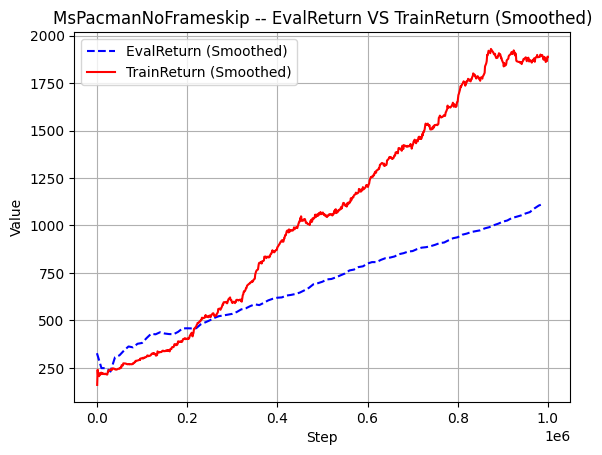

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the two CSV files
csv_file1 = './fig_data/EvalReturn_MsPacmanNoFrameskip-v0.csv'
csv_file2 = './fig_data/TrainReturn_MsPacmanNoFrameskip-v0.csv'

# Read CSV files
data1 = pd.read_csv(csv_file1)
data2 = pd.read_csv(csv_file2)

# Extract the common x-axis (assuming both CSVs have the same 'step' or x-axis column)
x_axis1 = data1['Step']
x_axis2 = data2['Step']

# Extract y-axis values from both CSVs (assuming both have 'Value' columns for y-axis)
y_axis1 = data1['Value']
y_axis2 = data2['Value']

# Define a rolling window smooth function (Simple Moving Average)
def smooth_curve(y_values, window_size):
    return y_values.rolling(window=window_size, min_periods=1).mean()

# Rolling window size for smoothing
window_size = 100  # Adjust window size for more or less smoothing

# Apply rolling average smoothing to the y-axis data
smooth_y_axis1 = smooth_curve(pd.Series(y_axis1), window_size)
smooth_y_axis2 = smooth_curve(pd.Series(y_axis2), window_size)

# Plot both curves with rolling average smoothing, no markers
plt.plot(x_axis1, smooth_y_axis1, label='EvalReturn (Smoothed)', color='blue', linestyle='--')
plt.plot(x_axis2, smooth_y_axis2, label='TrainReturn (Smoothed)', color='red', linestyle='-')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Value')
plt.title('MsPacmanNoFrameskip -- EvalReturn VS TrainReturn (Smoothed)')

# Add grid for better readability
plt.grid(True)

# Add legend to differentiate between the two curves
plt.legend()

# Show the plot
plt.show()